In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']


In [3]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [4]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['message'])
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [7]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

Accuracy: 0.968609865470852
Classification Report:
               precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [8]:
pip install seaborn wordcloud matplotlib


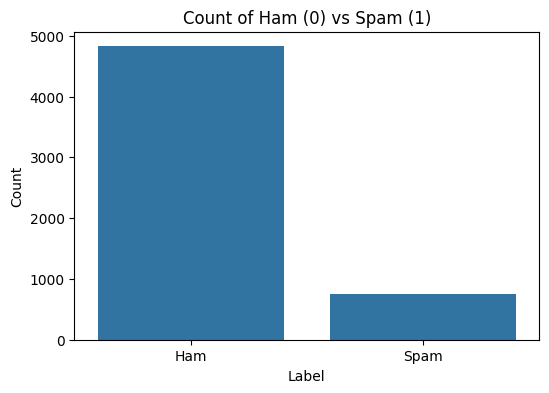

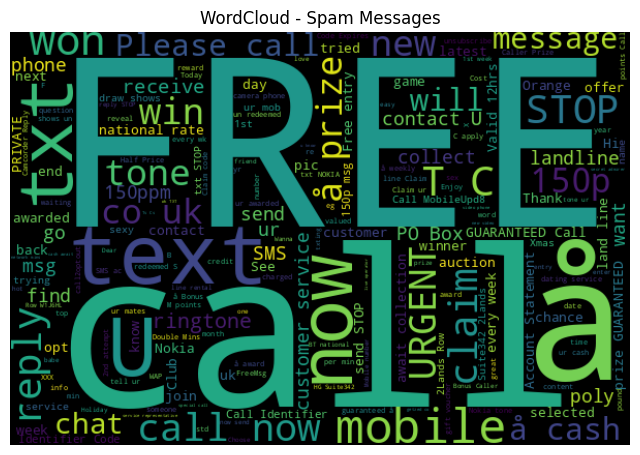

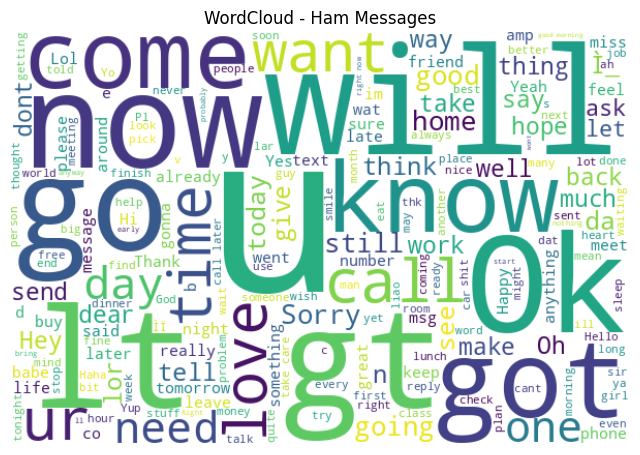

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title("Count of Ham (0) vs Spam (1)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


spam_words = " ".join(df[df['label'] == 1]['message'])
spam_wc = WordCloud(width=600, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(8, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Spam Messages")
plt.show()


ham_words = " ".join(df[df['label'] == 0]['message'])
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(8, 6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Ham Messages")
plt.show()
